# Proportion of Adults in CA Who Are Current Smokers

In this data analysis notebook I go through what insights this data set will provide us by looking at differences among age groups. Then I will discuss whether this can give us meaningful patterns related to mental health and depression rates in CA.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# Reading in the cleaned data:

smoke_df = pd.read_csv('../data/Cleaned/smoke_CLEANED.csv')

In [3]:
smoke_df

,Geography,year,category,category_name,percent,Standard Error,lower_cl,upper_cl
0,California,2012,Total Population,Total Population,12.7,0.281,12.2,13.3
1,California,2012,Race-Ethnicity,Hispanic,11.7,0.539,10.7,12.8
2,California,2012,Race-Ethnicity,African-American,15.7,1.374,13,18.4
3,California,2012,Race-Ethnicity,Asian/Pacific Islander,10.0,0.986,8,11.9
4,California,2012,Race-Ethnicity,White,13.3,0.365,12.6,14
...,...,...,...,...,...,...,...,...
135,California,2018,Education,College graduate,6.5,0.955,4.6,8.4
136,California,2018,Health Insurance,Insured,9.2,0.663,7.9,10.5
137,California,2018,Health Insurance,Uninsured,13.3,1.99,9.4,17.2
138,California,2018,Sex,Male,12.1,0.91,10.3,13.9


As mentioned in the data_exploration notebook for current smokers in CA from 2012-2018, I know I want to focus on differences across the age groups in our data!

However, before that, I want to briefly take some time to organize the data by year, category, category name, and the percent of current smokers to gain a better understanding of the divisions.

I will first do a simple .groupby function:

In [4]:
# Grouping the proportion of smokers by year, category and category name

smoke_df.groupby(['year','category','category_name'])['percent'].mean().to_frame()

percent
year category         category_name              
2012 Age              20 to 29 years         14.7
                      30 to 39 years         13.9
                      40 to 49 years         14.1
                      50 to 59 years         15.4
                      60 years and above      7.6
...                                           ...
2018 Race-Ethnicity   Other                   NaN
                      White                   NaN
     Sex              Female                  7.5
                      Male                   12.1
     Total Population Total Population        9.7

[140 rows x 1 columns]

### Observations:

* I think this is just a nicer way to represent our data, even though we haven't gotten into the details for smokers by age group over time.
* However, there seems to be a problem!!! Unfortunately, for some unknown reason, although this data set is taken from the same indicator I've used for my other data sets, this one specifically has different age group divisions...the other ones had 18-34, 35-44, 45-54, 55-64, and 65+ years. But clearly, looking at the table above, the age groups are 20-29, 30-39, 40-49, 50-59, and 60+ years.

We cannot directly manipulate this without changing the survey results, so we will have to find a way to work around this. I still want to weave this into my story because I believe that smoking is a very important, related topic to mental health. 

Before we figure out what to do with this, let's just take a moment to observe the differences between age groups by using our good old friend, a row filter by 'Age':

In [5]:
# Creating an Age filter:

age_filter = smoke_df['category'] == 'Age'

age_smoke_df = smoke_df[age_filter]

age_grouped = age_smoke_df.groupby(['year', 'category_name'])['percent'].sum().unstack()

age_grouped

category_name,20 to 29 years,30 to 39 years,40 to 49 years,50 to 59 years,60 years and above,Less than 20 years
year,,,,,,
2012,14.7,13.9,14.1,15.4,7.6,10.6
2013,16.5,11.8,11.2,13.8,8.0,10.5
2014,14.0,13.0,11.5,13.6,8.3,9.8
2015,12.2,14.6,10.7,11.6,6.9,3.1
2016,13.3,13.4,12.9,13.4,7.6,9.5
2017,12.6,14.4,10.6,8.4,7.3,0.0
2018,12.7,11.8,10.3,12.9,5.8,0.0


### Observations:

* OH! How interesting: There is a "Less than 20 years" age group too...!
* Although it's sort of difficult to comprehend trends right away by looking through all these numbers, we can make some initial observations before we plot it visually:
* In 2012, 50-59 year olds reported highest percentage of smokers,
* The rate of current smokers for this 50-59 age group actually decreases overall from 15.4% to 12.9%, but with some minor increases in 2016 and 2018. 
* Good thing is that young people (Less than 20 years) are not smoking as much recently, with percentages going all the way down to zero in 2017 and 2018. Interesting!
* 60 years and above also report very low smoking percentages across the years.
* In contrast, the 20 to 29 year olds and then the 30 to 39 year olds, look like they have the highest percentages of current smokers.

Let's look at a grouped table that only shows the age group, and the mean percentage of current smokers in each age group throughout the years: 

In [6]:
# Showing the category names (Age groups) and their mean percentages of smokers:

age_smoke = age_grouped.mean(axis=0)

age_smoke

category_name
20 to 29 years        13.714286
30 to 39 years        13.271429
40 to 49 years        11.614286
50 to 59 years        12.728571
60 years and above     7.357143
Less than 20 years     6.214286
dtype: float64

### Observations:

* So the younger age groups (besides the youngest group, less than 20 years) all have higher average smoker rates than the older groups! The 20 to 29 and 30 to 39 year age groups both have average rates in the 13% range, followed by the 50 to 59 and 40 to 49 year age groups.
* The older age groups are not behind by a lot, but still, it's interesting to see that a higher percentage of younger adults are smoking. 
* The 60+ age range is close to the lowest average percentage of current smokers, at about 7.36%, a little more than 1% higher than the youngest age group.

Let's check this data out on a plot, since I want to see it visually! 

<AxesSubplot:xlabel='year'>

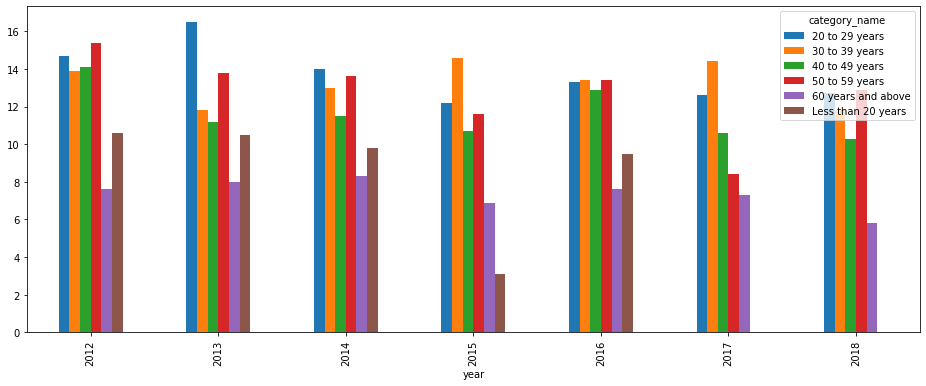

In [7]:
# To see it visually on a plot:

age_grouped.plot(kind='bar', figsize=(16,6))

Okay, that's a lot of bars on this graph! Let's try looking at a line chart:

<AxesSubplot:xlabel='year'>

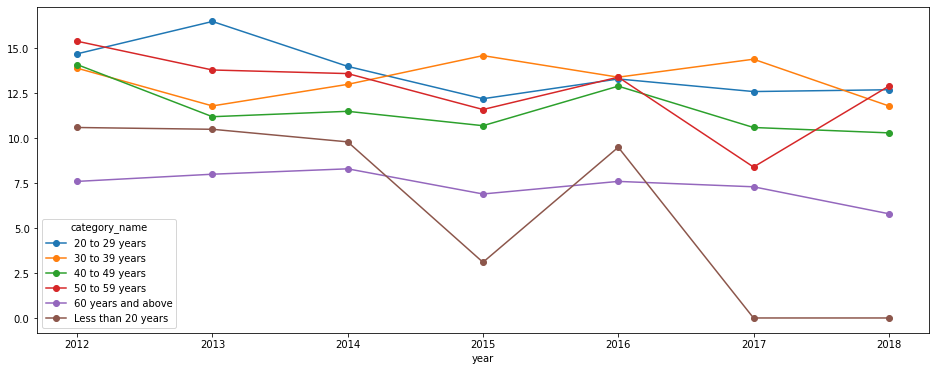

In [8]:
# Making a line plot:

age_grouped.plot(kind='line', figsize=(16,6), style='-o')

I find this a lot easier to comprehend! 

### Observations:

* We can see from this line plot that the 50 to 59 year-old age group, as I noted above in my observations, had the highest percentage of smokers in 2012, but saw an overall decrease even with a slight spike during the last year in 2018.

* In the beginning, it looks like the blue line, which represents the 20 to 29 year age group, had the highest percentage of smokers, before being overturned by the orange line, or the 30 to 39 year age group. This is consistent with my observations above before we plotted this graph.

So, once again to refresh our memory, my original depression rates data uncovered that the 55-64 year age group was consistently reporting higher levels of depression. I went into other data sets from the same LGHC indicator to see if we could gain a sense of what other factors or behaviors can connect to mental health. 

### Going forward?...

From this data, it looks like the oldest age groups, 50 to 59 and 60+ (which contains the 55-64 age range that I was hoping to learn more about), are actually not smoking as much as the younger groups. This means that although this was an insightful data exploration & analysis journey, it most likely has come to an end for the desired purpose of my data story, especially since this data uses different age groups. I learned a lot, but it looks like older adults are actually smoking a lot less throughout the years. 

With that, I will not be including current smokers into my final data story, because it's just not conclusive enough for me to comment on it. 

There are still several other factors to look at, so let's keep our hope up that we can include 2-3 other factors that might connect to mental health, and specifically depression, for older adults in the 55-64 age range. 

So it goes! 